In [52]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [53]:
#filtering for data analysts in the UK
datajobsUK= df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

datajobsUK= datajobsUK.dropna(subset=["salary_year_avg"])

In [54]:
datajobsUK

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
2602,Data Analyst,Admin & Data Analyst,United Kingdom,via Ai-Jobs.net,Full-time,False,United Kingdom,2023-02-10 13:55:49,False,False,United Kingdom,year,51014.0,NaN,Catch22,"[excel, word, outlook]","{'analyst_tools': ['excel', 'word', 'outlook']}"
16526,Data Analyst,Portfolio Data Feeds - Associate Portfolio Dat...,"Edinburgh, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-05-24 13:11:25,False,False,United Kingdom,year,100500.0,NaN,Addepar,"[sql, jupyter]","{'libraries': ['jupyter'], 'programming': ['sq..."
25994,Data Analyst,Data Analyst,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-07-04 13:16:42,False,False,United Kingdom,year,105000.0,NaN,Informa Group Plc.,"[go, gdpr, dax]","{'analyst_tools': ['dax'], 'libraries': ['gdpr..."
30265,Data Analyst,Data & Insight Analyst,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-03-24 13:22:35,True,False,United Kingdom,year,80850.0,NaN,Mention Me,"[go, bigquery, looker]","{'analyst_tools': ['looker'], 'cloud': ['bigqu..."
84680,Data Analyst,Data Analyst,"Stockport, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-07-23 00:12:17,True,False,United Kingdom,year,105000.0,NaN,NielsenIQ,[sql],{'programming': ['sql']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748172,Data Analyst,Healthcare Data Analyst,"Hemel Hempstead, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-03-01 20:26:22,False,False,United Kingdom,year,53014.0,NaN,NECSWS,"[sql, sql server]","{'databases': ['sql server'], 'programming': [..."
758707,Data Analyst,Data Analyst- Gas & Power,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-07-14 20:16:23,False,False,United Kingdom,year,100500.0,NaN,Energy Aspects Ltd,"[python, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
760011,Data Analyst,"Research Engineer, Science","London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-06-28 21:00:41,False,False,United Kingdom,year,177283.0,NaN,DeepMind,"[python, c++, tensorflow, pytorch, numpy, pandas]","{'libraries': ['tensorflow', 'pytorch', 'numpy..."
762692,Data Analyst,Data Analyst - Manager Research,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-02-09 04:18:12,False,False,United Kingdom,year,51014.0,NaN,Redington,[excel],{'analyst_tools': ['excel']}


In [55]:
datajobsUK = datajobsUK.explode("job_skills")



In [70]:
data_in_UK = datajobsUK.groupby("job_skills") ["salary_year_avg"].agg(["count", "median"])

In [71]:
top_data_uk = data_in_UK.sort_values(by= "median", ascending= False).head(10)

In [72]:

top_data_uk


,count,median
job_skills,,
pandas,1,177283.0
tensorflow,1,177283.0
numpy,1,177283.0
c++,1,177283.0
pytorch,1,177283.0
aurora,1,165000.0
mongodb,2,165000.0
mysql,3,165000.0
aws,3,165000.0


In [74]:
datascienceUK = data_in_UK.sort_values(by="count", ascending= False).head(10).sort_values(by= "median", ascending= False)

datascienceUK


,count,median
job_skills,,
tableau,13,100500.0
sql,33,98500.0
looker,6,96012.5
python,25,89100.0
power bi,7,89100.0
sas,8,80007.0
r,9,77017.5
excel,29,75550.0
go,9,71000.0


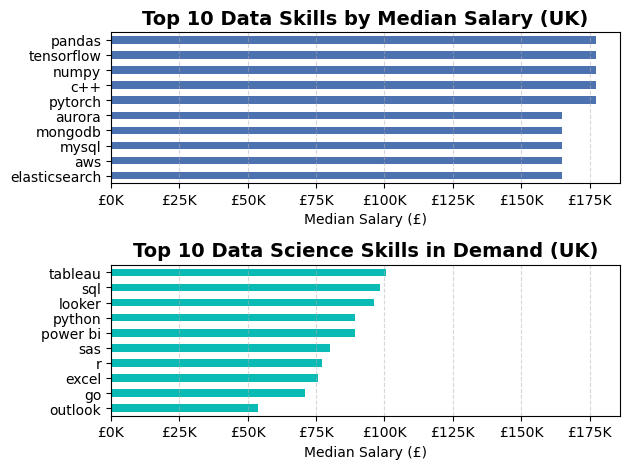

In [90]:
fig, ax = plt.subplots(2,1)

top_data_uk.plot(kind= "barh", y = 'median', ax = ax[0], color="#4C72B0",
    legend=False
)
ax[0].invert_yaxis()
ax[0].set_title("Top 10 Data Skills by Median Salary (UK)", fontsize=14, weight="bold")
ax[0].set_xlabel("Median Salary (£)")
ax[0].set_ylabel("")
ax[0].grid(axis="x", linestyle="--", alpha=0.5)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"£{int(y/1000)}K"))

datascienceUK.plot(kind= "barh", y = 'median', ax = ax[1], color="#0abab5",
    legend=False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title("Top 10 Data Science Skills in Demand (UK)", fontsize=14, weight="bold")
ax[1].set_xlabel("Median Salary (£)")
ax[1].set_ylabel("")
ax[1].grid(axis="x", linestyle="--", alpha=0.5)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"£{int(y/1000)}K"))

fig.tight_layout()

/var/folders/l0/k4x186gj0bb144vhk6pmyc3c0000gn/T/ipykernel_10869/3872035934.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap1 = cm.get_cmap("Blues")
/var/folders/l0/k4x186gj0bb144vhk6pmyc3c0000gn/T/ipykernel_10869/3872035934.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap2 = cm.get_cmap("turbo")
/var/folders/l0/k4x186gj0bb144vhk6pmyc3c0000gn/T/ipykernel_10869/3872035934.py:50: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) Arial.
  fig.tight_layout(rect=[0, 0.03, 1, 0.98])
/var/folders/l0/k4x186gj0bb144vhk6pmyc3c0000gn/T/ipykernel_10869/3872035934.py:50: UserWarning: Glyph 128202 (\N{BAR CHART}) missin

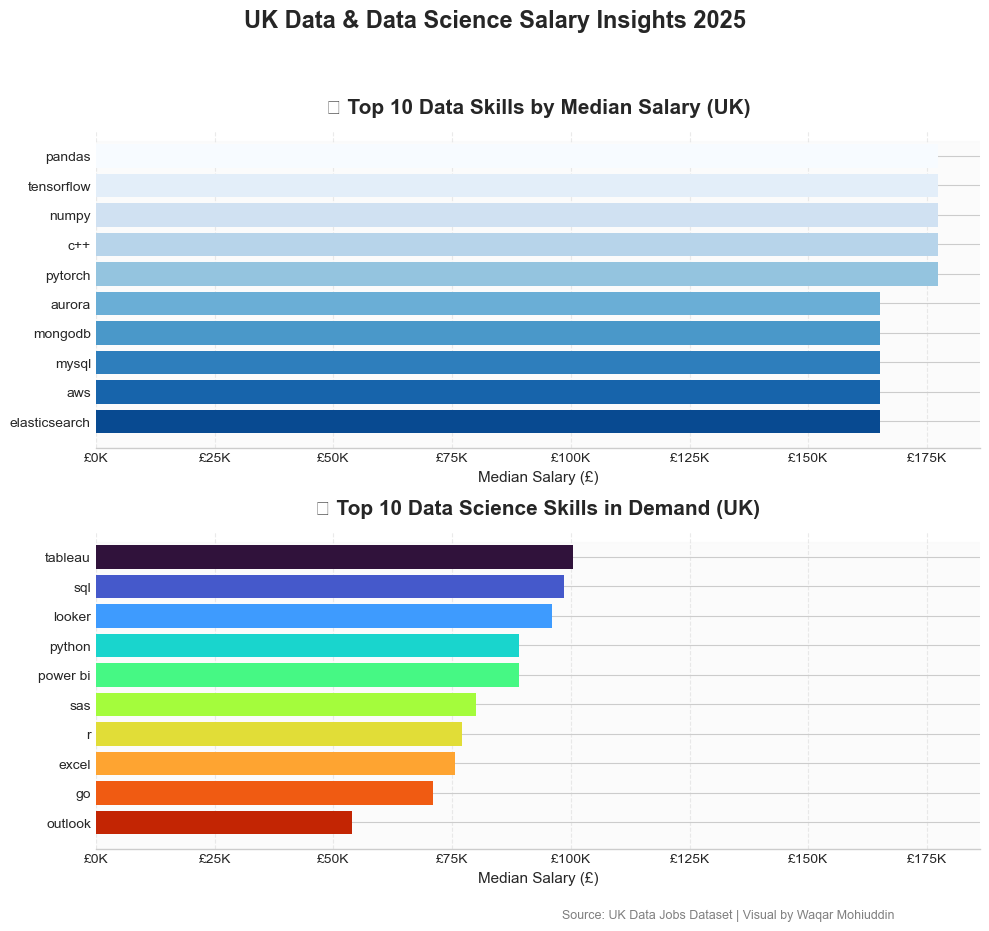

In [91]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import cm
import numpy as np

plt.style.use("seaborn-v0_8-whitegrid")

fig, ax = plt.subplots(2, 1, figsize=(10, 9), facecolor="white")

# --- Gradient helper ---
def gradient_bars(ax, data, color_map="cool"):
    n = len(data)
    cmap = cm.get_cmap(color_map, 256)
    for i, val in enumerate(data["median"]):
        # Normalise color across dataset
        color = cmap(i / n)
        ax.barh(i, val, color=color, edgecolor="none")
    ax.set_yticks(range(n))
    ax.set_yticklabels(data.index if data.index.name else range(n))
    ax.invert_yaxis()


# --- Top Plot ---
cmap1 = cm.get_cmap("Blues")
colors1 = [cmap1(i / len(top_data_uk)) for i in range(len(top_data_uk))]
ax[0].barh(top_data_uk.index, top_data_uk["median"], color=colors1, edgecolor="none")
ax[0].invert_yaxis()
ax[0].set_title("💼 Top 10 Data Skills by Median Salary (UK)", fontsize=15, weight="bold", pad=12)
ax[0].set_xlabel("Median Salary (£)", fontsize=11)
ax[0].grid(axis="x", linestyle="--", alpha=0.4)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"£{int(y/1000)}K"))
ax[0].spines[["top", "right", "left"]].set_visible(False)

# --- Bottom Plot ---
cmap2 = cm.get_cmap("turbo")
colors2 = [cmap2(i / len(datascienceUK)) for i in range(len(datascienceUK))]
ax[1].barh(datascienceUK.index, datascienceUK["median"], color=colors2, edgecolor="none")
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title("📊 Top 10 Data Science Skills in Demand (UK)", fontsize=15, weight="bold", pad=12)
ax[1].set_xlabel("Median Salary (£)", fontsize=11)
ax[1].grid(axis="x", linestyle="--", alpha=0.4)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"£{int(y/1000)}K"))
ax[1].spines[["top", "right", "left"]].set_visible(False)

# --- Shared Styling ---
fig.suptitle("UK Data & Data Science Salary Insights 2025", fontsize=17, weight="bold", y=1.02)
fig.text(0.9, 0.01, "Source: UK Data Jobs Dataset | Visual by Waqar Mohiuddin", 
         fontsize=9, color="gray", ha="right")
fig.tight_layout(rect=[0, 0.03, 1, 0.98])

# --- Optional background fade (subtle gray box for aesthetics) ---
for a in ax:
    a.add_patch(Rectangle((-0.02, -0.5), a.get_xlim()[1]*1.02, len(a.patches)+0.5,
                          transform=a.transData, color="#f9f9f9", zorder=-1, alpha=0.6))

plt.show()

/var/folders/l0/k4x186gj0bb144vhk6pmyc3c0000gn/T/ipykernel_10869/349361678.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/l0/k4x186gj0bb144vhk6pmyc3c0000gn/T/ipykernel_10869/349361678.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


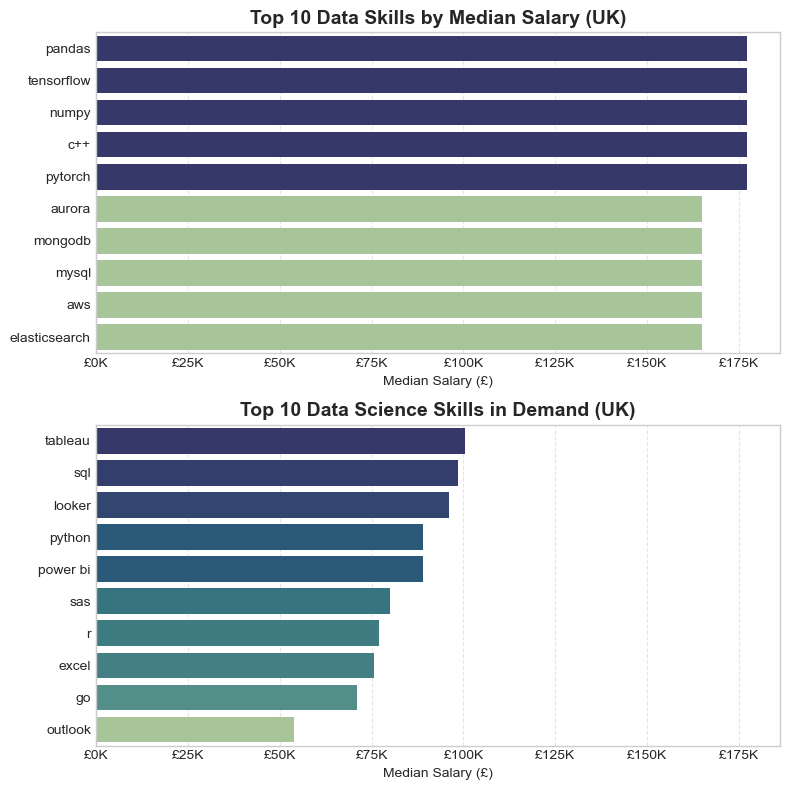

In [102]:
# --- Figure setup ---
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
cmap = sns.color_palette("crest", as_cmap=True)

# --- 1️⃣ Top 10 Data Skills by Median Salary ---
# Create normalized color mapping
norm1 = plt.Normalize(top_data_uk["median"].min(), top_data_uk["median"].max())
colors1 = [cmap(norm1(v)) for v in top_data_uk["median"]]

# Plot
sns.barplot(
    data=top_data_uk,
    x="median",
    y=top_data_uk.index,
    ax=ax[0],
    palette=colors1
)
ax[0].set_title("Top 10 Data Skills by Median Salary (UK)", fontsize=14, weight="bold")
ax[0].set_xlabel("Median Salary (£)")
ax[0].set_ylabel("")
ax[0].grid(axis="x", linestyle="--", alpha=0.5)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"£{int(y/1000)}K"))

# --- 2️⃣ Top 10 Data Science Skills in Demand ---
norm2 = plt.Normalize(datascienceUK["median"].min(), datascienceUK["median"].max())
colors2 = [cmap(norm2(v)) for v in datascienceUK["median"]]

sns.barplot(
    data=datascienceUK,
    x="median",
    y=datascienceUK.index,
    ax=ax[1],
    palette=colors2
)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title("Top 10 Data Science Skills in Demand (UK)", fontsize=14, weight="bold")
ax[1].set_xlabel("Median Salary (£)")
ax[1].set_ylabel("")
ax[1].grid(axis="x", linestyle="--", alpha=0.5)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"£{int(y/1000)}K"))

# --- Layout polish ---
fig.tight_layout()
plt.show()